# Limpieza de datos

### Dataset: TASA DE NATALIDAD EN BOGOTÁ

Url: http://localhost:8888/lab/tree/osb_tnatalidad.csv

Columnas

* "ANO": Año de nacimiento del bebé
* "LOCALIDAD_MADRE": Localidad donde vive la madre
* "EDAD_MADRE": Edad de la madre
* "SEXO": Sexo del nacido
* "REGIMEN_SEGURIDAD_SOCIAL": Indica si es Contributivo o subsidiado
* "TOTAL_NACIDOS": Número total de nacidos


## Objetivo del Análisis de datos:

* Medir el efecto de la fecundidad sobre el crecimiento de población relacionando el número total de nacimientos con la población total en un año determinado.

### Inicio de exploración del dataset

In [1]:
# Importar librerías

import numpy as np
import pandas as pd

## Cargar los datos y examinar Dataset

In [114]:
df_natalidad = pd.read_csv('osb_tnatalidad.csv', sep='\t', encoding='latin-1')

df_natalidad

,ANO,LOCALIDAD_MADRE,EDAD_MADRE,SEXO,REGIMEN_SEGURIDAD_SOCIAL,TOTAL_NACIDOS
0,2009,00 - Bogotá,18.0,Femenino,Contributivo,1039
1,2009,00 - Bogotá,27.0,Femenino,Contributivo,1934
2,2009,00 - Bogotá,25.0,Masculino,Contributivo,2052
3,2009,00 - Bogotá,17.0,Masculino,No Asegurado,491
4,2009,00 - Bogotá,29.0,Femenino,Contributivo,2093
...,...,...,...,...,...,...
69968,2024,06 - Tunjuelito,33.0,Masculino,No Asegurado,1
69969,2024,02 - Chapinero,39.0,Femenino,No Asegurado,1
69970,2024,14 - Los Mártires,40.0,Masculino,Subsidiado,1
69971,2024,02 - Chapinero,32.0,Femenino,No Asegurado,1


In [115]:
# Información general
df_natalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69973 entries, 0 to 69972
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ANO                       69973 non-null  int64  
 1   LOCALIDAD_MADRE           69973 non-null  object 
 2   EDAD_MADRE                69898 non-null  float64
 3   SEXO                      69973 non-null  object 
 4   REGIMEN_SEGURIDAD_SOCIAL  69973 non-null  object 
 5   TOTAL_NACIDOS             69973 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [116]:
## Descripción general de columnas
df_natalidad.describe().astype(int)

,ANO,EDAD_MADRE,TOTAL_NACIDOS
count,69973,69898,69973
mean,2016,28,41
std,4,8,149
min,2009,10,1
25%,2012,21,2
50%,2016,28,6
75%,2020,36,25
max,2024,54,2103


## Eliminar duplicados 

In [118]:
# Contar cuantos registros están duplicados
df_natalidad.duplicated().sum()

0

In [119]:
df_natalidad.dtypes
df_natalidad['LOCALIDAD_MADRE'].unique()

array(['00 - Bogotá', '18 - Rafael Uribe Uribe', '10 - Engativá',
       '11 - Suba', '08 - Kennedy', '05 - Usme', '06 - Tunjuelito',
       '16 - Puente Aranda', '01 - Usaquén', '14 - Los Mártires',
       '07 - Bosa', '04 - San Cristóbal', '09 - Fontibón',
       '03 - Santa Fe', '19 - Ciudad Bolívar', '02 - Chapinero',
       '13 - Teusaquillo', '12 - Barrios Unidos', 'Sin Dato',
       '15 - Antonio Nariño', '17 - La Candelaria', '20 - Sumapaz'],
      dtype=object)

## Manejo de Valores nulos

In [121]:
# Rellenar con la media de una columna específica
print( df_natalidad['EDAD_MADRE'].isna().sum() )

df_natalidad['EDAD_MADRE'] = df_natalidad['EDAD_MADRE'].fillna(df_natalidad['EDAD_MADRE'].mean())

print( df_natalidad['EDAD_MADRE'].isna().sum() )

75
0


In [122]:
# Validación final
print("Nulos por columna:")
print(df_natalidad.isnull().sum())

print("\nDuplicados:", df_natalidad.duplicated().sum())

print("\nRango de edades:", df_natalidad['EDAD_MADRE'].min(), "-", df_natalidad['EDAD_MADRE'].max())

Nulos por columna:
ANO                         0
LOCALIDAD_MADRE             0
EDAD_MADRE                  0
SEXO                        0
REGIMEN_SEGURIDAD_SOCIAL    0
TOTAL_NACIDOS               0
dtype: int64

Duplicados: 0

Rango de edades: 10.0 - 54.0


In [123]:
# Ver columnas con valores nulos o faltantes (En este caso son faltantes)
df_natalidad.isna().sum()

df_natalidad.isnull().sum()


ANO                         0
LOCALIDAD_MADRE             0
EDAD_MADRE                  0
SEXO                        0
REGIMEN_SEGURIDAD_SOCIAL    0
TOTAL_NACIDOS               0
dtype: int64

In [124]:
# Reemplazamos los registros "Sin dato" en la columna "LOCALIDAD_MADRE" por "Desconocido"
df_cleaned_natalidad['LOCALIDAD_MADRE'] = df_cleaned_natalidad['LOCALIDAD_MADRE'].replace('Sin Dato', 'Desconocido')
df_cleaned_natalidad['LOCALIDAD_MADRE'].value_counts()

LOCALIDAD_MADRE
00 - Bogotá                5258
08 - Kennedy               4193
11 - Suba                  4137
19 - Ciudad Bolívar        3951
10 - Engativá              3928
07 - Bosa                  3879
01 - Usaquén               3638
04 - San Cristóbal         3622
18 - Rafael Uribe Uribe    3611
05 - Usme                  3573
09 - Fontibón              3474
06 - Tunjuelito            3348
16 - Puente Aranda         3247
03 - Santa Fe              2999
14 - Los Mártires          2887
02 - Chapinero             2863
12 - Barrios Unidos        2740
15 - Antonio Nariño        2624
13 - Teusaquillo           2486
17 - La Candelaria         1762
Desconocido                1318
20 - Sumapaz                435
Name: count, dtype: int64

## Guardar datos limpios

In [126]:
df_natalidad.to_csv('cleaned_natalidad.csv', index=False)

print("Datos limpios guardados como 'cleaned_natalidad.csv'")

Datos limpios guardados como 'cleaned_natalidad.csv'


## Crear Dataframe con el dataset después de la etapa de limpieza

In [128]:
df_cleaned_natalidad = pd.read_csv('cleaned_natalidad.csv')
df_cleaned_natalidad

,ANO,LOCALIDAD_MADRE,EDAD_MADRE,SEXO,REGIMEN_SEGURIDAD_SOCIAL,TOTAL_NACIDOS
0,2009,00 - Bogotá,18.0,Femenino,Contributivo,1039
1,2009,00 - Bogotá,27.0,Femenino,Contributivo,1934
2,2009,00 - Bogotá,25.0,Masculino,Contributivo,2052
3,2009,00 - Bogotá,17.0,Masculino,No Asegurado,491
4,2009,00 - Bogotá,29.0,Femenino,Contributivo,2093
...,...,...,...,...,...,...
69968,2024,06 - Tunjuelito,33.0,Masculino,No Asegurado,1
69969,2024,02 - Chapinero,39.0,Femenino,No Asegurado,1
69970,2024,14 - Los Mártires,40.0,Masculino,Subsidiado,1
69971,2024,02 - Chapinero,32.0,Femenino,No Asegurado,1


# Importamos librerías de visualización


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

## Gráfico de barras: Conteo de EDAD_MADRE vs TOTAL_NACIDOS

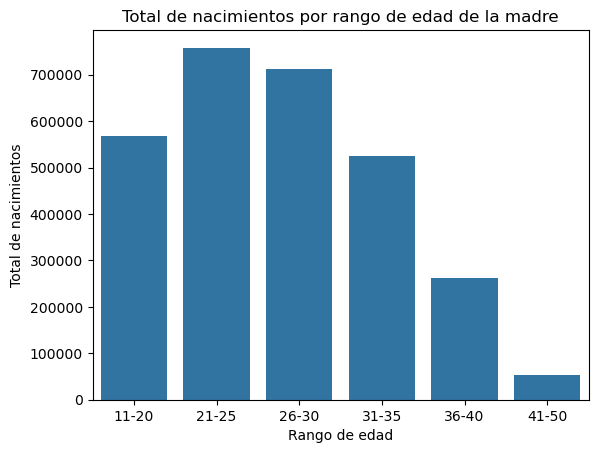

In [132]:
# Crear rangos de edad
df_cleaned_natalidad['RANGO_EDAD'] = pd.cut(
    df_cleaned_natalidad['EDAD_MADRE'], 
    bins=[10, 20, 25, 30, 35, 40, 50], 
    labels=['11-20', '21-25', '26-30', '31-35', '36-40', '41-50']
)

# Agrupar por rango
df_rangos = df_cleaned_natalidad.groupby('RANGO_EDAD', observed=True)['TOTAL_NACIDOS'].sum().reset_index()

# Graficar
sns.barplot(data=df_rangos, x='RANGO_EDAD', y='TOTAL_NACIDOS')
plt.title("Total de nacimientos por rango de edad de la madre")
plt.xlabel("Rango de edad")
plt.ylabel("Total de nacimientos")
plt.show()


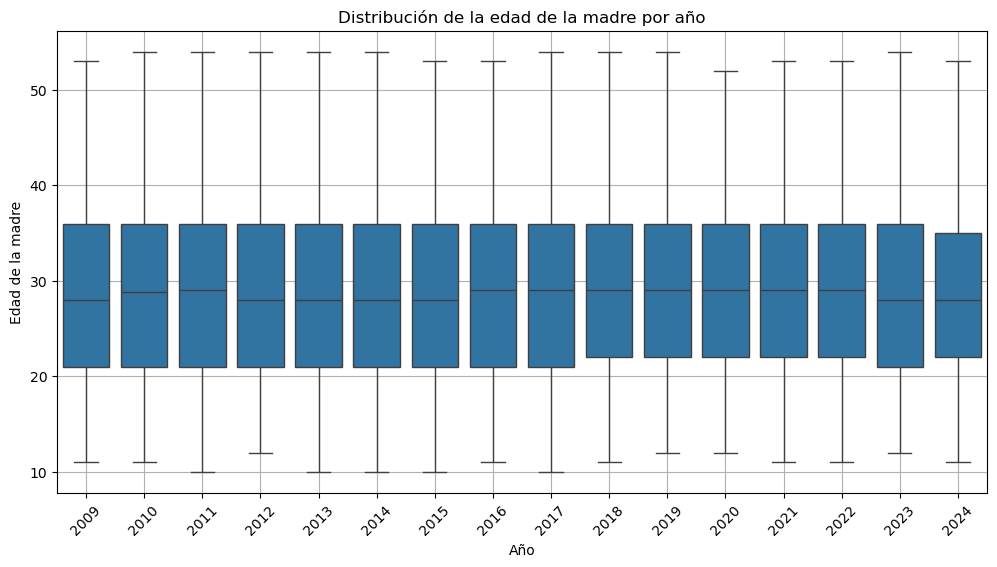

In [155]:
# Gráfica Distribución de la edad de la madre por año 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned_natalidad, x='ANO', y='EDAD_MADRE')
plt.title("Distribución de la edad de la madre por año")
plt.xlabel("Año")
plt.ylabel("Edad de la madre")
plt.grid(True)
plt.xticks(rotation=45)  # si hay muchos años
plt.show()


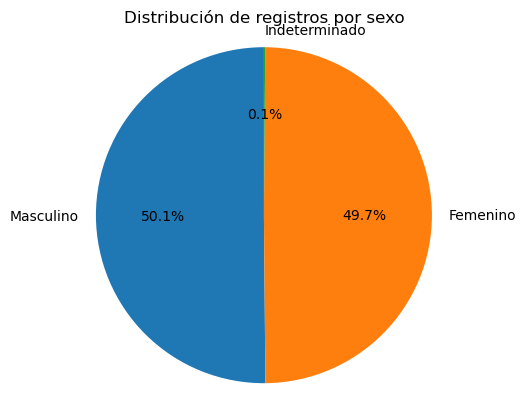

In [134]:
import matplotlib.pyplot as plt

# Conteo de registros por sexo
sexo_counts = df_cleaned_natalidad['SEXO'].value_counts()

# Pie chart
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribución de registros por sexo")
plt.axis('equal')
plt.show()



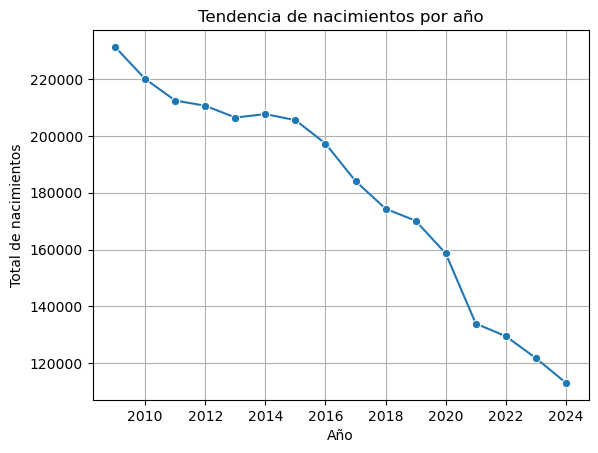

In [135]:
# Tendencia de nacimientos por año
df_anual = df_cleaned_natalidad.groupby('ANO')['TOTAL_NACIDOS'].sum().reset_index()
sns.lineplot(data=df_anual, x='ANO', y='TOTAL_NACIDOS', marker='o')
plt.title("Tendencia de nacimientos por año")
plt.xlabel("Año")
plt.ylabel("Total de nacimientos")
plt.grid(True)
plt.show()


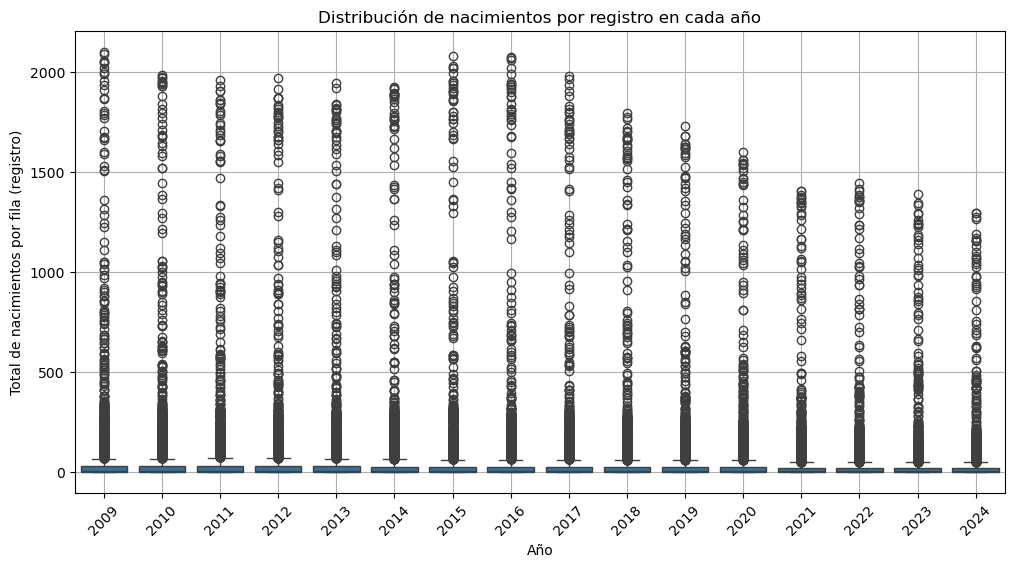

In [136]:
# Distribución de nacimientos por registro en cada año

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned_natalidad, x='ANO', y='TOTAL_NACIDOS')
plt.title("Distribución de nacimientos por registro en cada año")
plt.xlabel("Año")
plt.ylabel("Total de nacimientos por fila (registro)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


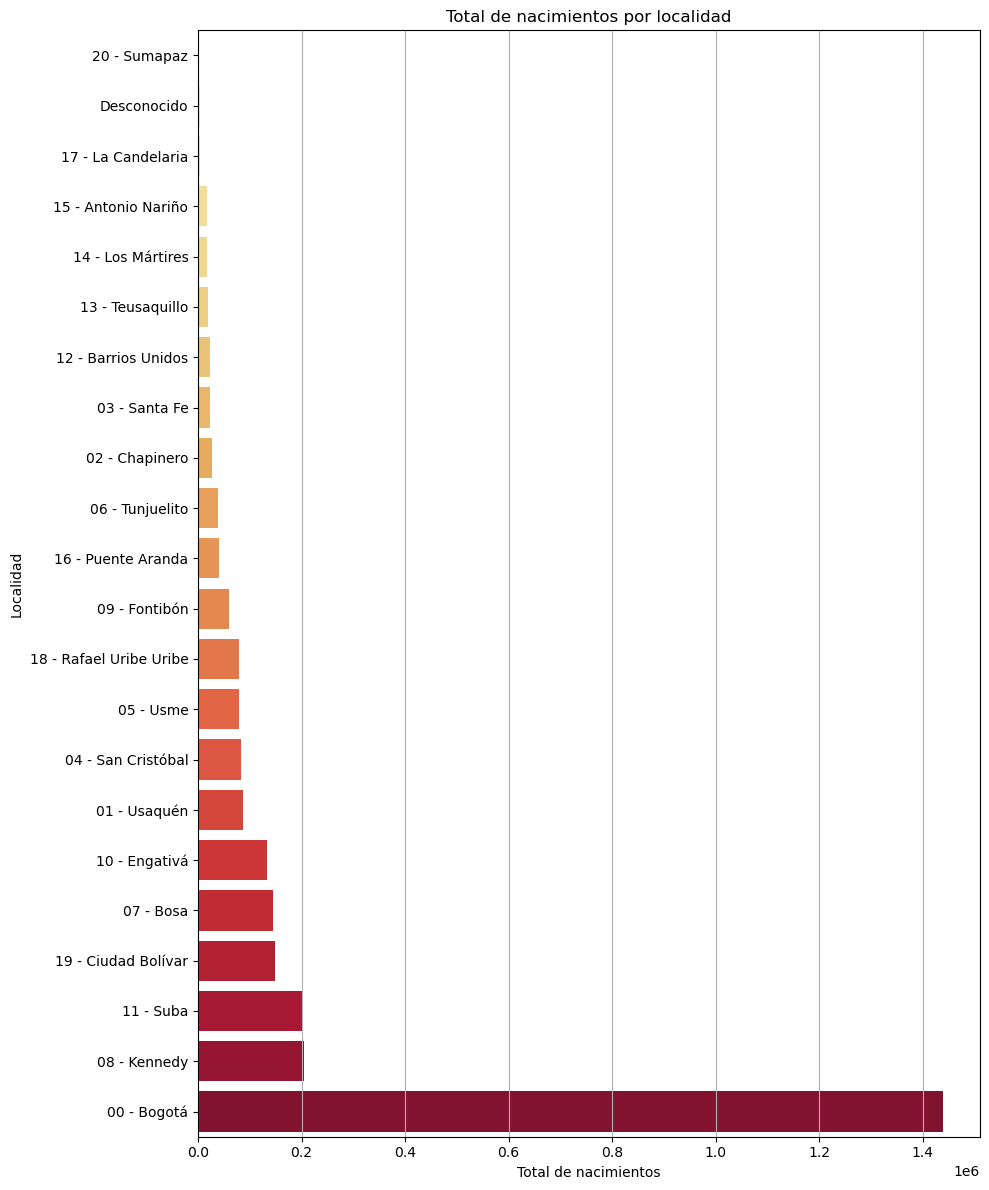

In [100]:
# Ordenar por total de nacimientos
df_localidad_sorted = df_localidad.sort_values(by='TOTAL_NACIDOS', ascending=True)

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 12))
sns.barplot(
    data=df_localidad_sorted,
    y='LOCALIDAD_MADRE',
    x='TOTAL_NACIDOS',
    hue='LOCALIDAD_MADRE',   # Se asigna la variable al hue
    palette='YlOrRd',
    dodge=False,
    legend=False             # Oculta la leyenda (porque ya está en el eje Y)
)
plt.title("Total de nacimientos por localidad")
plt.xlabel("Total de nacimientos")
plt.ylabel("Localidad")
plt.grid(axis='x')
plt.tight_layout()
plt.show()
